# Lab 2:  Problem 2

In [2]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/tma4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

We want to solve the fixed point system $x = f(x)$ where $f(x) = \cos(0.5\pi x)+1$, using a fixed point iteration. Verify that $x=1$ is a solution to this fixed point system.

**a)** Explain (with less than three sentences) why $[0,2]$ is a natural choice of a domain for a fixed point iteration for solving $x = f(x)$. 

<font color='blue'>
    
   Solution: Observe that $cos(0.5\pi x)$ is in the interval [1, -1] when $x \in [0,2]$. Since the function is continous, there exist a solution x in the interval [0,2] s.t. f(x) = 0. Also, since the function is periodic, we can easily find the other solutions by adding 2.

</font>

**b)** Fixed point iterations. Write a function which runs a fixed point iteration for $f$ and returns the sequence of iterations $[x_0, x_1, x_2, \ldots, x_n]$. Using initial point $x_0 = 0.1$, plot the evolution of the error as a function of the number of iterations. Does the iteration seem to converge?

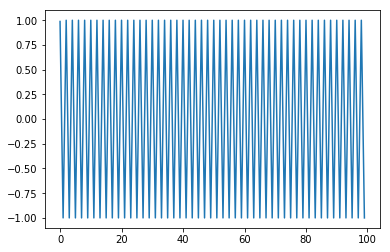

In [3]:
# In python you can create functions using the lambda function.
# For example: with the following decleration, f is now a function for which f(x) evaluates sin(x)
# f = lambda x: np.sin(x)


def banach_fp(f, x0, n, p):
    # f: the function for which to solve x=f(x)
    # x0: initial value
    # n: number of iterations
    
    x = np.zeros(n)
    for i in range(n):
        x0 = f(x0)
        x[i] = x0
    return x

x0 = 0.1
f = lambda x: np.cos(0.5*np.pi*x) + 1
n = 100
p = 1
# The banac_fp function is called in the following way:
x = banach_fp(f, x0, n, p)
plt.plot(np.arange(n),x - 1)


<font color='blue'>
    
   Your comments here: No, the iteratoion does not converge! It seems to change betweeen the values 0 and 2.

</font>

As you hopefully observed in the previous subproblem, not all fixed point iterations will converge. However, we can in some cases modify the fixed point iteration such that it converges. If we for example add some constant or variable to both sides, the solution does not change. Therefore, let $p$ be some parameter, and add $px$ to both sides of our system to obtain

$$ x + px = \cos(0.5\pi x) + 1 + px $$

Verify for yourselves that this can be rewritten into

$$ x = \frac{1}{1+p} \big( \cos(0.5\pi x) + 1 + px \big) =: g(x) $$

We will in the following assume $p\geq0$.

**b)** Modify your code to run the fixed point iteration to run $x_{n+1} = g(x_n)$. Test different values of $0\leq p\leq 2$. Which values of $p$ seem to give convergence?

*Hint*: If you followed the template above, you can reuse the banach_fp function and just change the function $f$.

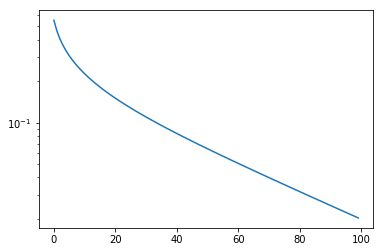

In [4]:
p = 0.3
n = 100
f = lambda x: (np.cos(0.5*np.pi*x) + 1 + p*x)/(1+p)
x = banach_fp(f,x0,n,p)
plt.plot(np.arange(n),abs(x-1))
plt.yscale("log")


<font color='blue'>
    
   Your comments here: As we increase p, the function will converge. Between p = 0.2 and 0.3 the function starts to converge slowly. With n = 100 and p = 0.3, the function clearly converges towards the solution 1. And of course, the convergence rate is faster as we increase p (to a certain value).

</font>

**c)** Test $p=0.5,1,1.5$ and $2$ and make a convergence plot. Additionally, give a rough estimate of the convergence rate of the method.  

*Hint:* For fixed point iterations, the error is in general of the form $\|x-x^\ast\| = \mathcal O(q^n)$, where $q$ determines the order of convergence. Plot lines of the form $l(x) \propto q^n$ and experiment to find values of $q$ which corresponds to the convergence plots for the fixed point iterations.

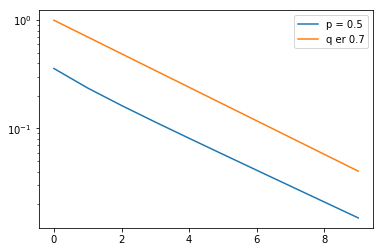

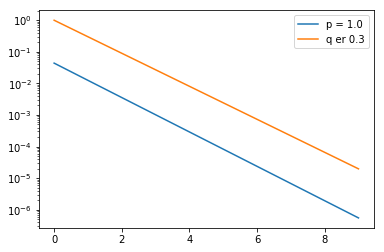

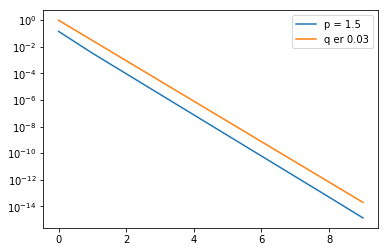

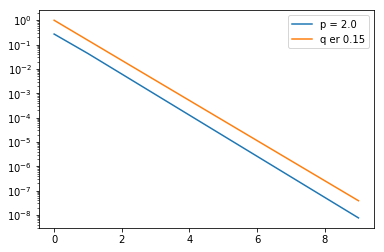

In [14]:
p = 0.5
n = 10
q = 0.8
l = np.arange(n)
for i in range(4):
  
    x = banach_fp(f,x0,n,p)
    text = ("p = " + str(p))
    plt.plot(np.arange(n),abs(x-1), label = text)
 #   print("q er", np.round(q,2), " når p er",p)
    if i == 0:
        plt.plot(l,0.7**l, label = "q er 0.7")
        plt.yscale("log")
    elif i == 1:
        plt.plot(l,0.3**l, label = "q er 0.3")
        plt.yscale("log")
    elif i == 2:
        plt.plot(l,0.03**l, label = "q er 0.03")
        plt.yscale("log")
    elif i == 3:
        plt.plot(l,0.15**l, label = "q er 0.15")
        plt.yscale("log")
    p+=0.5 
    plt.legend(loc = 1)

    plt.show()


#x1 = x[int(n/4):] # Last half of the values of x
#l1 = l[int(n/4):] # --||-- of l
#while (abs(x1-1) < q**l1).all(): #Check if x is bound by q**l as n is "large"
#    q -= 0.01
#q+=0.01

<font color='blue'>
Fill in your observed convergence rates in the following table:

</font>

| $p$ | $q$  |
|:---:|:----:|
| 0.5 | 0.70 |
| 1.0 | 0.30 |
| 1.5 | 0.03 |
| 2.0 | 0.15 |

**d)** Show that the Lipschitz constant for $g$ with domain $[0,2]$ is given by 
$$ L = \frac{1}{1+p}\max\{p,0.5\pi-p\}. $$

*Hint:* Recall that for continuously differentiable, real-valued functions f, and compact domains $D$, the Lipschitz constant is given by
$$ L = \max_{x\in D} | f'(x) |. $$
You might also find the property $|x| = \max\{x,-x\}$ helpful in solving this problem.

<font color='blue'>
Solution: $$ g'(x) = \frac{1}{1 + p}(-sin(0.5 \pi x)(0.5\pi) + p) $$
         $$g''(x) = \frac{1}{1 + p}(-cos(0.5 \pi x)(0.5\pi)^2) $$
         
Then we set g''(x) = 0 which gives x = 1. Maximum of g'(x) is then at  x = 1 or at the ends(x = 0 & x = 2) 
Both x = 0 and x = 2 gives us:

$$ L = \frac{p}{1 + p} $$

While x = 1 gives:

$$ L = \frac{|p - 0.5\pi|}{1 + p}$$

The numerator is always smaller than p, thus we are only interested in the negative values (so we can switch signs in the absolute value area). 

$$ L = \frac{1}{1+p}\max\{p,0.5\pi-p\}. $$
</font>

The Banach fixed point theorem tells us that $\|x_{n+1} - x^\ast\| \leq L\|x_n - x^\ast\|$. In particular, this means that $\|x_n - x^\ast\| = \mathcal O(L^n)$. 

**e)** Compute $L$ and $f'(1)$ for $p = 0.5,1,1.5$ and $2$ and compare with the order of convergence you observed in problem **2b**. What do you observe?

<font color='blue'>
    
Fill out the following table:

| $p$ | $L$  |   $|f'(1)|$  | $q$  |
|:---:|:----:|:------------:|:----:|
| 0.5 | 0.714|   0.71386    | 0.70 |
| 1.0 | 0.5  |   0.28553    | 0.30 |
| 1.5 | 0.6  |   0.02832    | 0.03 |
| 2.0 | 0.667|   0.14331    | 0.15 |


Your comments here:  $|f'(1)|$ and q seem to match.

</font>